In [13]:
import matplotlib.pyplot as plt
import numpy as np


def binary(symbols, samples):
    # symbols: no. of symbols to generate
    # sym_len: symbol duration or samples in a symbol
    rand_n = np.random.rand(symbols)
    rand_n[np.where(rand_n >= 0.5)] = 1
    rand_n[np.where(rand_n < 0.5)] = 0

    sig = np.zeros(symbols * samples)

    id_1 = np.where(rand_n == 1)

    for i in id_1[0]:
        temp = i * samples
        sig[temp:temp + samples] = 1
    return sig, rand_n


plt.close('all')

# Params

In [14]:
fs = 2.1e6  # Sampling rate (Hz)
fc = 334e6  # Carrier Frequency (Hz)
dt = 1 / fs
symbols_ = 12  # Number of symbols (code bits length)
samples_ = 2000  # Number of samples of each symbol
symbol_duration = samples_ * dt
max_duration = symbols_ * symbol_duration
t = np.arange(0, max_duration, dt)

# Carrier Wave

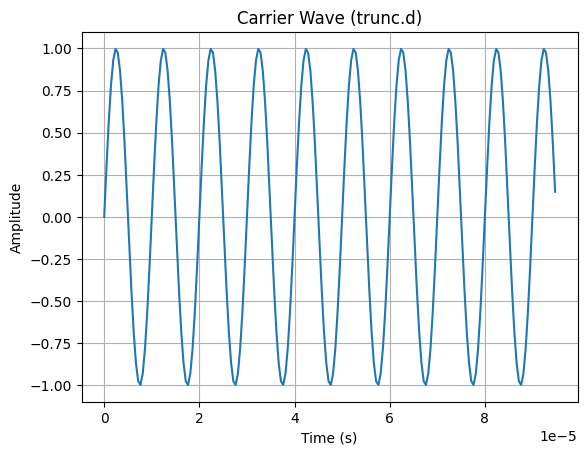

In [21]:
carrier_wave = np.sin(2 * np.pi * fc * t)
plt.plot(t[:200], carrier_wave[:200])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Carrier Wave (trunc.d)')
plt.grid()

# Binary Sequence

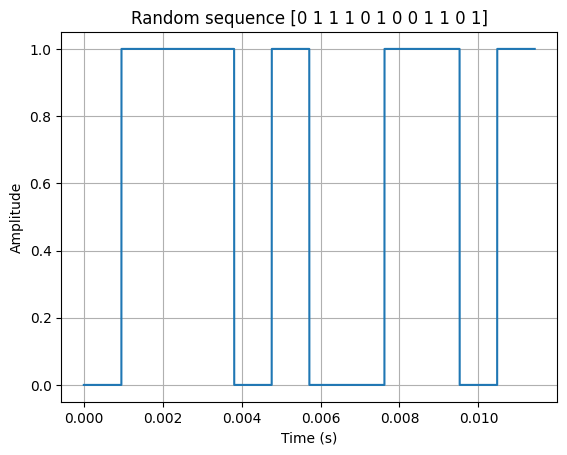

In [16]:
sig_, code_ = binary(symbols_, samples_)
plt.plot(t, sig_)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f"Random sequence {np.int32(code_)}")
plt.grid()

# PWM

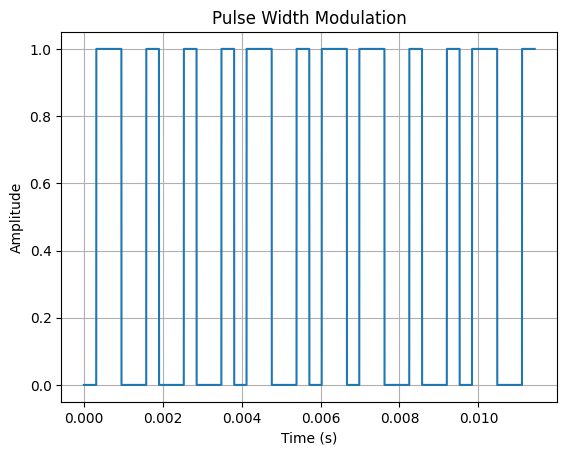

In [17]:
ZERO = 0.33
ONE = 0.66

symbol_t = np.arange(0, symbol_duration, dt)
zero_pwm = symbol_t % symbol_duration >= symbol_duration * ZERO
one_pwm = symbol_t % symbol_duration >= symbol_duration * ONE

pwm_sig = np.zeros(symbols_ * samples_)
i = 0
for bit in code_:
    out_sig_idx = i * samples_
    pwm_sig[out_sig_idx:out_sig_idx + samples_] = zero_pwm if bit == 0 else one_pwm
    i += 1

plt.plot(t, pwm_sig)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Pulse Width Modulation')
plt.grid()

# ASK

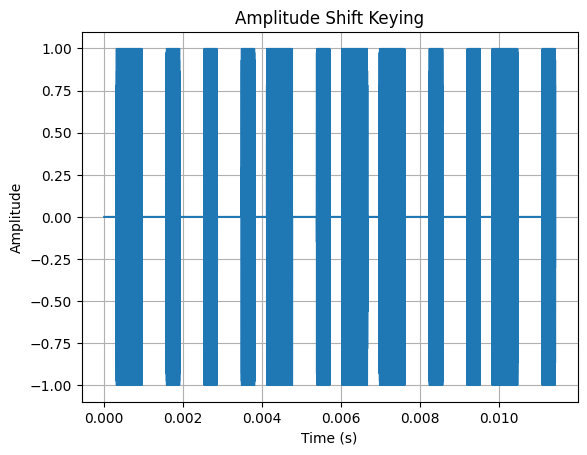

In [18]:
ask_ = carrier_wave * pwm_sig
plt.plot(t, ask_)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Amplitude Shift Keying')
plt.grid()